In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [3]:
train = pd.read_csv('./data/train.csv')

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [6]:
features = train.drop(columns=['target'], inplace=False)
labels   = train['target']

In [7]:
features['location'].isnull().sum()

2533

In [8]:
features['keyword'].isnull().sum()

61

In [9]:
features['location'][features['location'].notnull()][:10]

31                       Birmingham
32    Est. September 2012 - Bristol
33                           AFRICA
34                 Philadelphia, PA
35                       London, UK
36                         Pretoria
37                     World Wide!!
39                   Paranaque City
40                   Live On Webcam
42                        milky way
Name: location, dtype: object

In [10]:
features['keyword'][features['keyword'].notnull()][:10]

31    ablaze
32    ablaze
33    ablaze
34    ablaze
35    ablaze
36    ablaze
37    ablaze
38    ablaze
39    ablaze
40    ablaze
Name: keyword, dtype: object

In [11]:
features.groupby('keyword').nunique()

,id,keyword,location,text
keyword,,,,
ablaze,36,1,27,35
accident,35,1,25,35
aftershock,34,1,12,32
airplane%20accident,35,1,29,34
ambulance,38,1,23,38
...,...,...,...,...
wounded,37,1,23,37
wounds,33,1,26,33
wreck,37,1,26,37


In [12]:
corpus = features['text']
len(corpus)

7613

In [13]:
corpus[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [14]:
import re
import string

# lower text, remove punctuation and numbers
def clean_text_1(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\\n', '', text)
    return text

In [15]:
corpus = [clean_text_1(x) for x in corpus]
corpus[0]

'our deeds are the reason of this earthquake may allah forgive us all'

In [16]:
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')

STOP_WORDS.add('amp')
STOP_WORDS.add('https')
STOP_WORDS.add('like')

# remove stop words and extract lemmas
def clean_text_2(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
    lemmas = [lemma for lemma in lemmas if lemma not in STOP_WORDS]
    return ' '.join(lemmas)

In [17]:
corpus = [clean_text_2(x) for x in corpus]
corpus[0]

'deed reason earthquake allah forgive'

In [18]:
from collections import Counter

def count_word_occurences():
    top_words = Counter()

    for doc in corpus:
        words = doc.split(' ')
        
        for word in words:
            top_words[word] += 1 if len(word) > 1 else 0
        
    return top_words

top_words = count_word_occurences()
top_words.most_common(30)

[('fire', 355),
 ('new', 230),
 ('people', 199),
 ('news', 186),
 ('burn', 175),
 ('video', 173),
 ('kill', 172),
 ('crash', 161),
 ('come', 160),
 ('emergency', 158),
 ('bomb', 158),
 ('disaster', 153),
 ('attack', 152),
 ('body', 149),
 ('year', 148),
 ('time', 144),
 ('look', 143),
 ('police', 139),
 ('man', 136),
 ('home', 135),
 ('day', 134),
 ('know', 133),
 ('family', 132),
 ('think', 129),
 ('flood', 128),
 ('building', 128),
 ('good', 126),
 ('love', 124),
 ('storm', 123),
 ('train', 118)]

[]

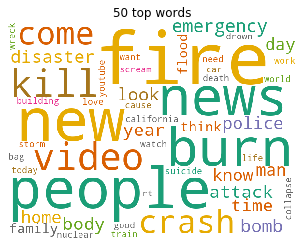

In [19]:
from wordcloud import WordCloud

max_words = 50

wc = WordCloud(max_words=max_words, 
               background_color='white', 
               colormap='Dark2', 
               max_font_size=150, 
               width=600,
               height=450,
               random_state=42)
wc.generate_from_frequencies(top_words)

plt.imshow(wc)
plt.axis('off')
plt.title('{} top words'.format(max_words))
plt.plot()

In [20]:
'Count of words: {}'.format(len(top_words))

'Count of words: 15298'

In [21]:
from nltk import bigrams

def create_bigrams(text):
    word_bigrams = list(bigrams(text.split()))
    return [' '.join(bigram) for bigram in word_bigrams]

In [22]:
create_bigrams(corpus[0])

['deed reason', 'reason earthquake', 'earthquake allah', 'allah forgive']

In [23]:
def count_top_bigrams():
    top_bigrams = Counter()
    
    for doc in corpus:
        bigrams = create_bigrams(doc)
        
        for bigram in bigrams:
            top_bigrams[bigram] += 1
        
    return top_bigrams

top_bigrams = count_top_bigrams()
top_20_bigrams = top_bigrams.most_common()[:20]
top_20_bigrams

[('body bag', 62),
 ('suicide bomber', 60),
 ('burn building', 55),
 ('youtube video', 43),
 ('northern california', 41),
 ('cross body', 39),
 ('oil spill', 39),
 ('california wildfire', 35),
 ('suicide bombing', 32),
 ('mass murder', 32),
 ('bomber detonate', 31),
 ('natural disaster', 30),
 ('prebreak best', 30),
 ('detonate bomb', 29),
 ('home raze', 29),
 ('forest fire', 28),
 ('heat wave', 28),
 ('severe thunderstorm', 28),
 ('mass murderer', 28),
 ('late home', 28)]

[]

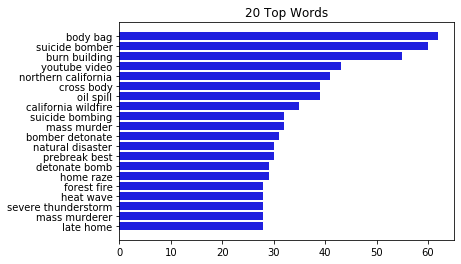

In [24]:
bigrams_labels = [bigram[0] for bigram in top_20_bigrams]
bigrams_counts = [bigram[1] for bigram in top_20_bigrams]

sns.barplot(bigrams_counts, bigrams_labels, color='blue')
plt.title('20 Top Words')
plt.plot()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), analyzer='word', stop_words='english')
X_train = vectorizer.fit_transform(corpus)

In [26]:
X_train.shape

(7613, 55036)

In [27]:
y_train = labels

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()
scores = cross_val_score(log_reg, X_train, y_train, cv=3, scoring='f1')
scores

array([0.59056494, 0.52034384, 0.62312634])

In [29]:
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()
scores = cross_val_score(nb_clf, X_train, y_train, cv=3, scoring='f1')
scores

array([0.67079646, 0.63358779, 0.7019655 ])

In [30]:
naive_bayes_clf = MultinomialNB()
naive_bayes_clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
test = pd.read_csv('./data/test.csv')
test_corpus = test['text']

test_corpus = [clean_text_1(x) for x in test_corpus]
test_corpus = [clean_text_2(x) for x in test_corpus]

In [32]:
X_test = vectorizer.transform(test_corpus)
y_pred = naive_bayes_clf.predict(X_test)

In [33]:
submission = pd.read_csv('./data/sample_submission.csv')
submission['target'] = y_pred

submission.to_csv('./data/submission.csv', index=False)